# Desafío - Expansiones basales
- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Expansiones basales.

## Descripción

- Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
- Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
- Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre `compresive_strength_concrete.csv`. Importe y genere estadísticas descriptivas.

In [4]:
# Utilizar esta celda para importar los módulos y el set de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('compresive_strength_concrete.csv')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
# Utilizar esta celda para explorar estadísticas descriptivas. Tip: Usar describe()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Ejercicio 2: Descripción
- El vector objetivo tiene el nombre de `Concrete compressive strength(MPa, megapascals) `
- Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice `iloc`.
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decide si es necesario normalizarlos/escalarlos.

In [6]:
# Utilizar esta celda para renombrar las variables si se decide hacerlo
col_new = ['Cement',
            'Blast_Furnace_Slag',
            'Fly_Ash',
            'Water',
            'Superplasticizer',
            'Coarse_Aggregate',
            'Fine_Aggregate',
            'Age',
            'Concrete_compressive_strength']

df.columns = col_new
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
# Utilizar esta celda para inspeccionar el tipo de dato. Tip: Usar df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


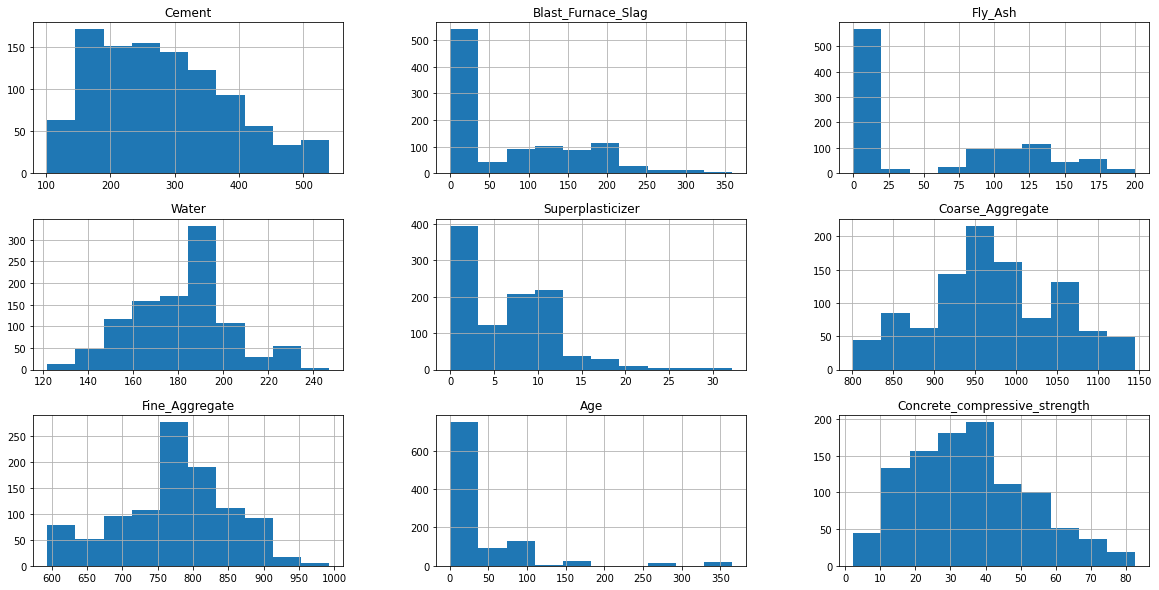

In [8]:
# Utilizar esta celda para explorar distribución. Tip: Usar df.hist() cambiando figsize

df.hist(figsize=(20,10));

En base a la distribución de las variables, se puede ver que tanto `Blast_Furnace_Slag`, `Fly_Ash`, `Superplasticizer`, y `Age` presentan cierto sesgo en la distribución, ya que poseen cola izquierda muy pesada, concentando la mayor cantidad de datos acá. Además, se ve que las escalas de las varibles son muy distintas, por los debemos reescalar las variables estandarizandolas.

Mencionar que nuestra variable objetivo es numérica, por lo que nos encontramos frente a un problema de regresión lineal multiple

### Ejercicio 3: Modelo
- En base al vector objetivo, decida el mejor modelo e importe con `pygam`. Condicional a esto, importe las métricas de desempeño asociadas.

In [9]:
# Utilizar esta celda para importar el modelo y las métricas

from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, mean_absolute_error

- Genere conjuntos de entrenamiento y validación.

In [12]:
# Utilizar esta celda para generar los subconjuntos de muestras, y estandarizar los datos

df_y = df['Concrete_compressive_strength']
df_x = df.drop('Concrete_compressive_strength',axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=13)

scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

- Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper parámetro lam así como las métricas de desempeño asociadas.

In [23]:
# Utilizar esta celda para generar el modelo y reportar lam y métricas

gam = LinearGAM()
gam.fit(X_train, y_train)

y_hat = gam.predict(X_test)

print(f'Hiperparámetro lam: {gam.lam}')

print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_hat)):.3f}')
print(f'MAE Test: {mean_absolute_error(y_test, y_hat):.3f}')

Hiperparámetro lam: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]
RMSE Test: 6.045
MAE Test: 4.672


- Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.

In [34]:
# Utilizar esta celda para generar el segundo modelo y reportar summary

lams = np.logspace(-3, 3, 3)
lams = [lams]*len(X_train.columns)

search_params = {'lam': lams}

gam_gs = LinearGAM()
gam_gs.gridsearch(X_train.to_numpy(), y_train.to_numpy(), **search_params)

gam_gs.summary()

  0% (0 of 6561) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:27:23
  0% (2 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:26:19
  0% (3 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:25:40
  0% (4 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:25:11
  0% (5 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:25:13
  0% (6 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:25:16
  0% (7 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:25:17
  0% (8 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:25:09
  0% (9 of 6561) |                       | Elapsed Time: 0:00:02 ETA:   0:25:10
  0% (10 of 6561) |                      | Elapsed Time: 0:00:02 ETA:   0:25:09
  0% (11 of 6561) |                      | Elapsed Time: 0:00:02 ETA:   0:26:03
  0% (12 of 6561) |                     

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     78.2997
Link Function:                     IdentityLink Log Likelihood:                                 -2980.3142
Number of Samples:                          721 AIC:                                             6119.2278
                                                AICc:                                            6139.1052
                                                GCV:                                               30.3044
                                                Scale:                                             24.4447
                                                Pseudo R-Squared:                                    0.921
Feature Function                  Lam

c:\Users\RodrigoBarraza\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  # This is added back by InteractiveShellApp.init_path()


In [35]:
# Utilizar esta celda para reportar métricas

y_hat = gam_gs.predict(X_test)

print(f'Hiperparámetro lam: {gam_gs.lam}')

print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_hat)):.3f}')
print(f'MAE Test: {mean_absolute_error(y_test, y_hat):.3f}')

Hiperparámetro lam: [[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.001]]
RMSE Test: 5.923
MAE Test: 4.505


Resumiendo, tenemos lo siguiente:

- Métrica **RMSE**:
    - modelo sin hiperparámetros: 6.045
    - modelo con hiperparámetros: 5.923
- Métrica **MAE**:
    - modelo sin hiperparámetros: 4.672
    - modelo con hiperparámetros: 4.505

En base a las métricas, el modelo con hiperparámetros ajustados tiene mejores métricas. Por lo tanto, `el mejor modelo es el modelo con hiperparámetros`.

### Ejercicio 4: Dependencia Parcial
- En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
- Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.

In [42]:
# Utilizar esta celda para definir la función solicitada

def dependencia_parcial(modelo):
    fig, axs = plt.subplots(1,8, figsize = (33,6));
    titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = modelo.generate_X_grid(term=i)
        ax.plot(XX[:, i], modelo.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], modelo.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
        ax.set_title(titles[i]);

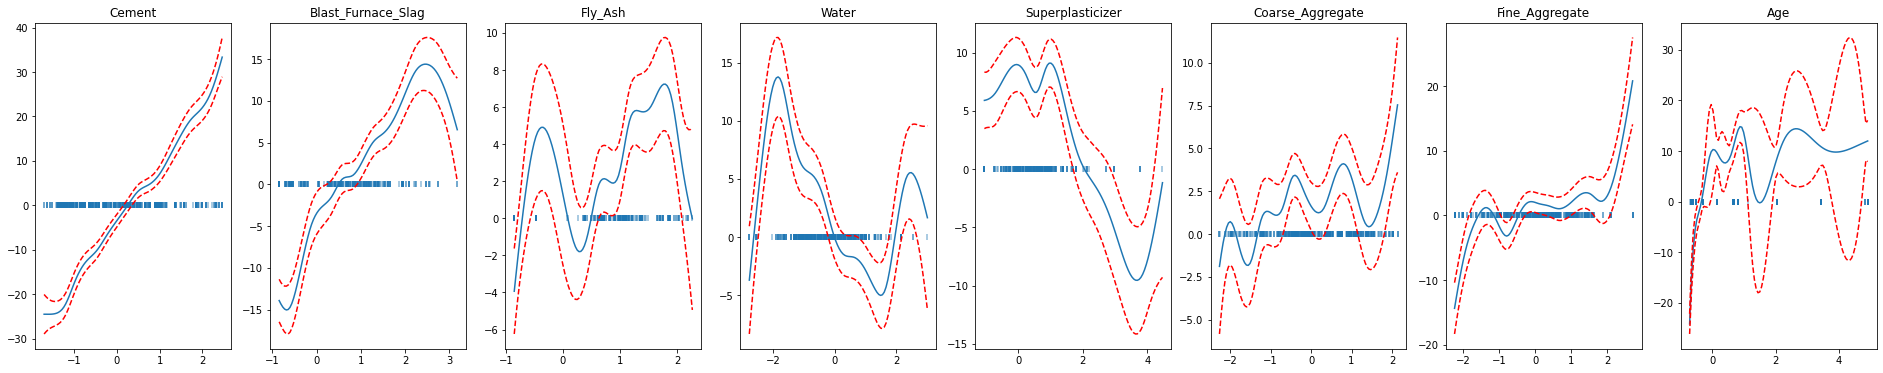

In [43]:
# Utilizar esta celda para realizar el llamado de la función

dependencia_parcial(gam_gs)

- Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

Se comentan las principales relaciones:
* `Cement`: mientras más cemento, más fuerza compresiva.
* `blast_furnace_slag`: sube la fuerza a medida que este valor se hace más grande, alcanza un máximo y luego baja.
* `Water`: a medida que water sube, el valor máximo de la fuerza se alcanza al comienzo, luego la fuerza baja.
* `Coarse_Aggregate`, `Fine_Aggregate`: a medida que crecen, la fuerza sube prontamente para estabilizarse y casi al final sube vertiginosamente.
* `age`: a medida que age crece, la fuerza alcanza el valor máximo pronto y a mdida que aumenta se mantiene más o menos constante.